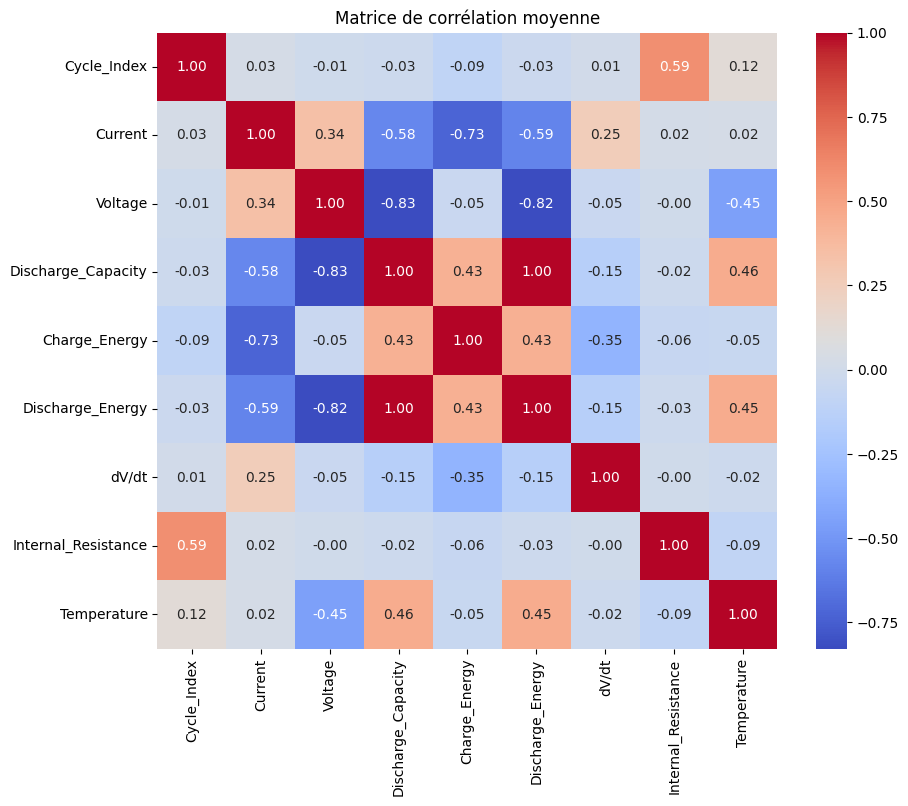

In [1]:
import os
import pandas as pd


# Chemin vers le répertoire contenant les fichiers CSV
data_path = r'C:\\Users\\pc\\Desktop\\data\\all batchs'

# Lister tous les fichiers CSV dans le répertoire donné
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Initialiser une matrice cumulative avec des zéros
cumulative_correlation_matrix = None
n_files = len(csv_files)

# Parcourir chaque fichier CSV
for csv_file in csv_files:
    file_path = os.path.join(data_path, csv_file)
    
    # Lire le fichier CSV
    df = pd.read_csv(file_path)
    
    # Supprimer la colonne 'Data_Point' si elle existe
    if 'Data_Point' in df.columns:
        df = df.drop(columns=['Data_Point'])
    
    # Calculer la matrice de corrélation
    correlation_matrix = df.corr()
    
    # Ajouter la matrice de corrélation à la matrice cumulative
    if cumulative_correlation_matrix is None:
        cumulative_correlation_matrix = correlation_matrix
    else:
        cumulative_correlation_matrix += correlation_matrix

# Diviser la matrice cumulative par le nombre total de fichiers pour obtenir la moyenne
average_correlation_matrix = cumulative_correlation_matrix / n_files

# Optionnel : Afficher la matrice de corrélation moyenne sous forme de carte thermique (heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(average_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation moyenne')
plt.show()
